In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib inline

In [2]:
aga = misc.imread('aga.png')

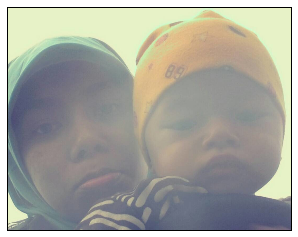

In [42]:
plt.imshow(aga)
plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
print type(aga)
print aga.shape, aga.dtype

<type 'numpy.ndarray'>
(849, 1080, 3) uint8


In [46]:
print aga[:,:,0].shape
print aga[:,:,0]

(849, 1080)
[[231 231 231 ..., 232 232 232]
 [231 231 231 ..., 232 232 232]
 [231 231 231 ..., 232 232 232]
 ..., 
 [166 166 165 ...,  94  93  92]
 [166 160 151 ...,  94  93  91]
 [152 149 143 ...,  99  99  95]]


## Plot RGB

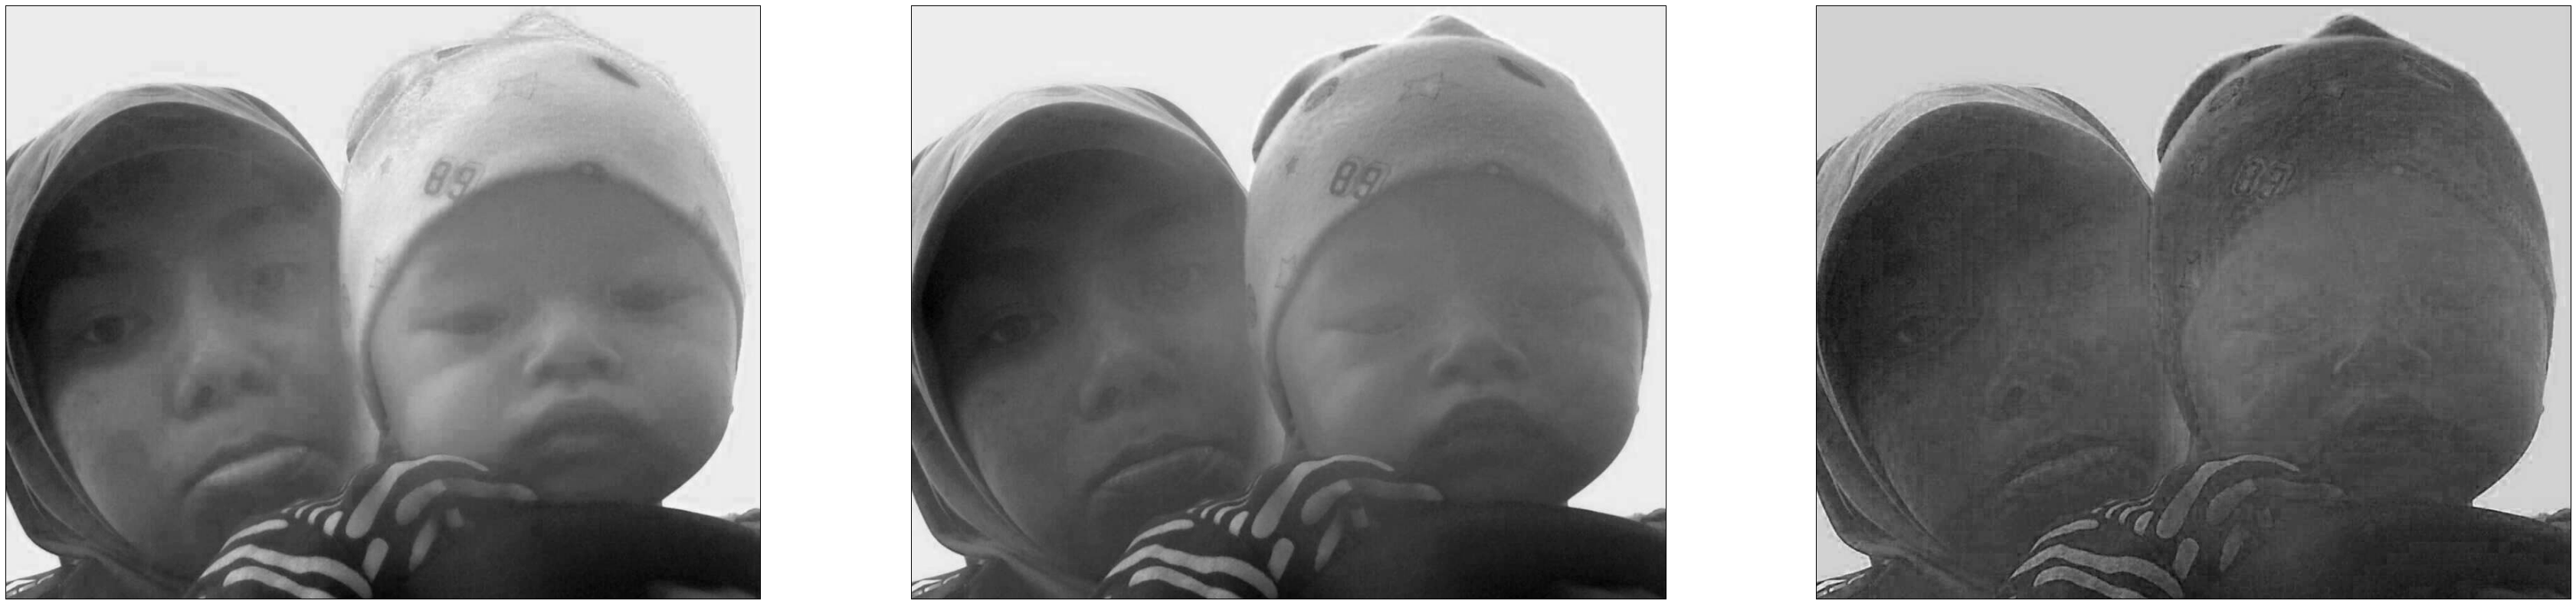

In [47]:
plt.figure(figsize=(60,30))
plt.subplot(131), plt.imshow(aga[:,:,0], cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(aga[:,:,1], cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(aga[:,:,2], cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

## Fourier transform

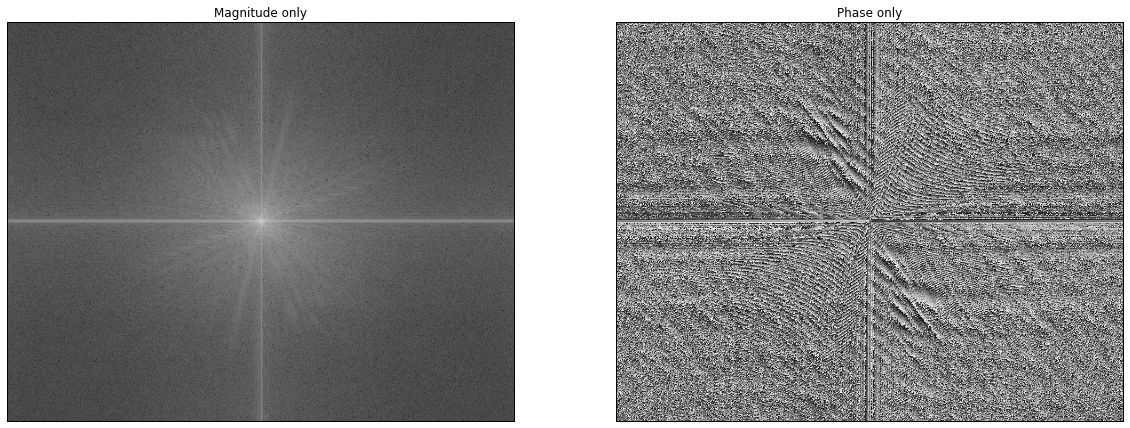

In [145]:
f = np.fft.fft2(aga[:,:,0])
fshift = np.fft.fftshift(f)

mag = np.abs(fshift); phase = np.angle(fshift)
#real = fshift.real; imag = fshift.imag

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(np.log(mag), cmap='gray')
plt.title('Magnitude only')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(phase, cmap='gray')
plt.title('Phase only')
plt.xticks([]), plt.yticks([])

plt.show()

In [117]:
mag.shape

(849, 1080)

In [118]:
mag[0,0], mag[425,540]

(210.03655731165566, 13269728.781924728)

In [119]:
mask = np.ones(mag.shape)
mask[420:430,:500] = 0
mask[420:430,580:] = 0
mask[:385,535:545] = 0
mask[465:,535:545] = 0

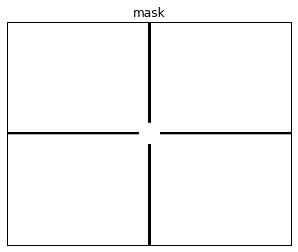

In [120]:
plt.imshow(mask, cmap='gray')
plt.title('mask')
plt.xticks([]), plt.yticks([])
plt.show()

In [121]:
newmag = mag*mask

/home/ridlo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


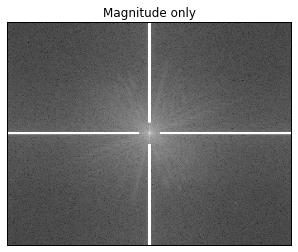

In [122]:
plt.imshow(np.log(newmag), cmap='gray')
plt.title('Magnitude only')
plt.xticks([]), plt.yticks([])
plt.show()

In [123]:
newfshift = newmag*np.exp(1j*phase)

In [124]:
f_ishift = np.fft.ifftshift(newfshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

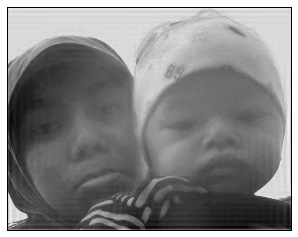

In [125]:
plt.imshow(img_back, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()